# Maternal Health Risk Data

## Objective: Prediction of Maternal Health Risk Levels

Inputs:

1.Age: Age in years when a woman is pregnant.

2.SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.

3.DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

4.BS: Blood glucose levels is in terms of a molar concentration, mmol/L.

5.BodyTemp: Body temperatures as Fahrenheit.

6.HeartRate: A normal resting heart rate in beats per minute.

Outputs:

Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute; high, low, and mid risk

## Importing the libraries

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Importing the dataset

## Exploratory Data Analysis

In [3]:
# importing Dataset
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.shape

(1014, 7)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [6]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [7]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


## Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [9]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [10]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [11]:
df.isnull()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False


In [12]:
# check the null values in datastet
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

## Data Visualization

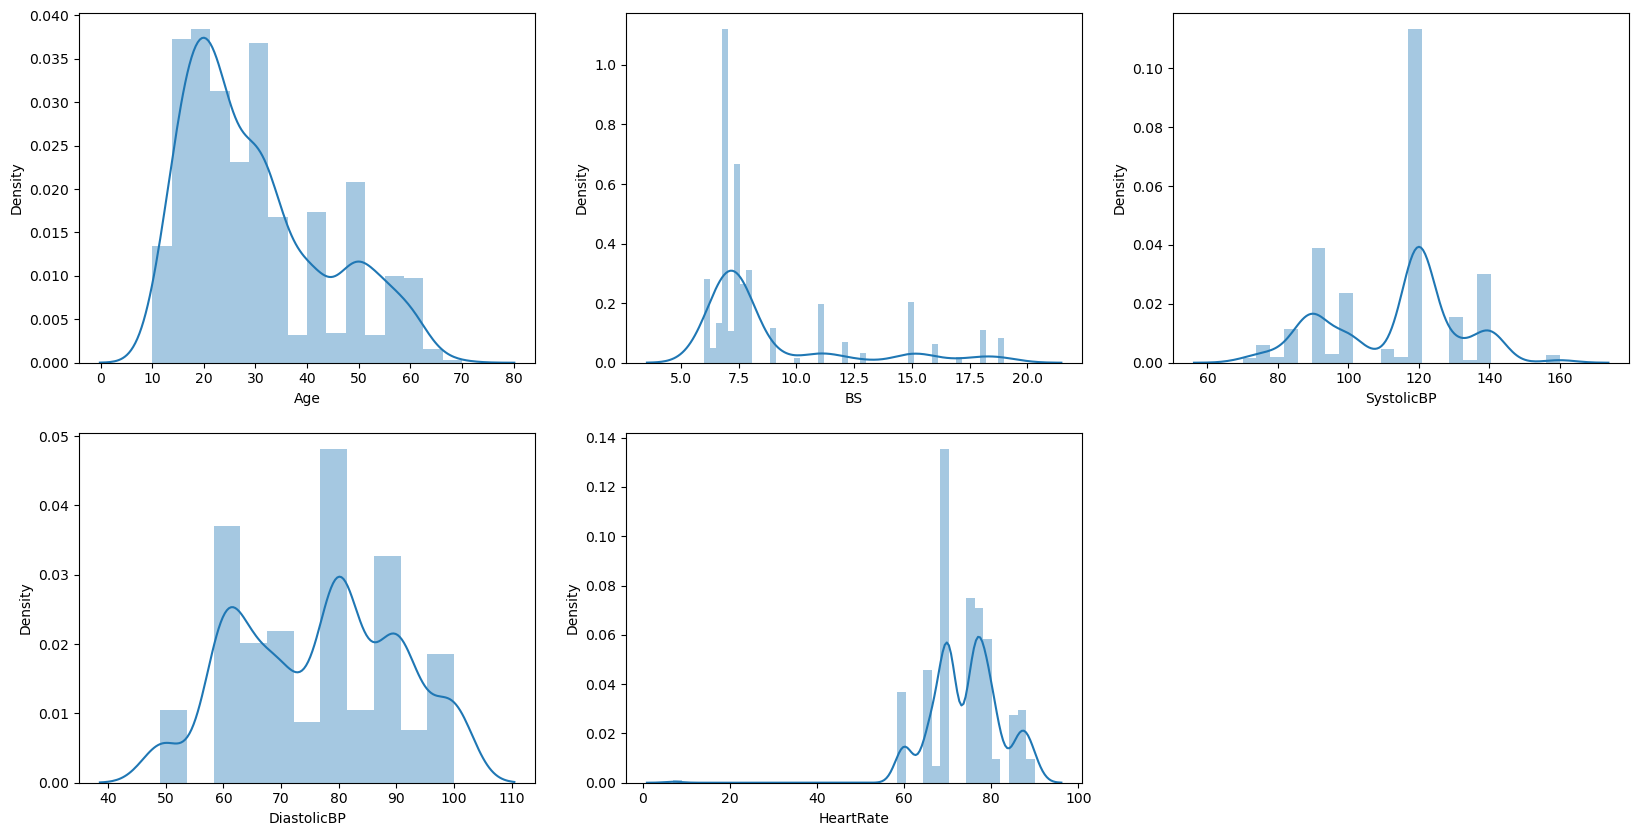

In [13]:
features = ['Age', 'BS', 'SystolicBP', 'DiastolicBP', 'HeartRate']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,3,i+1)
 sns.distplot(df[col])
plt.show()

<Figure size 1600x800 with 0 Axes>

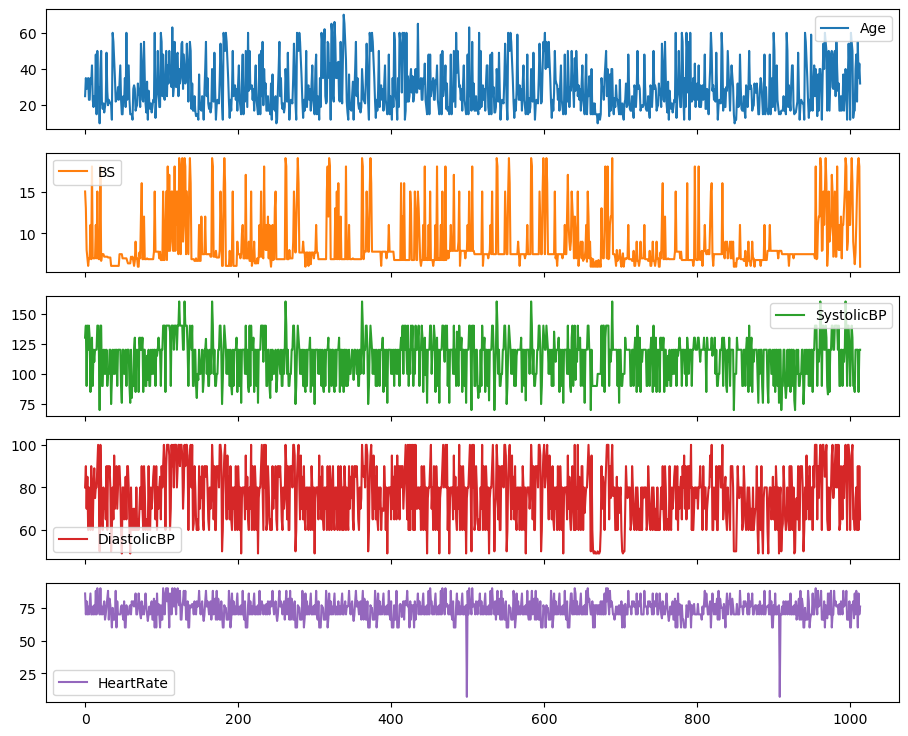

In [14]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Age', 'BS', 'SystolicBP', 'DiastolicBP', 'HeartRate']
axes = df[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

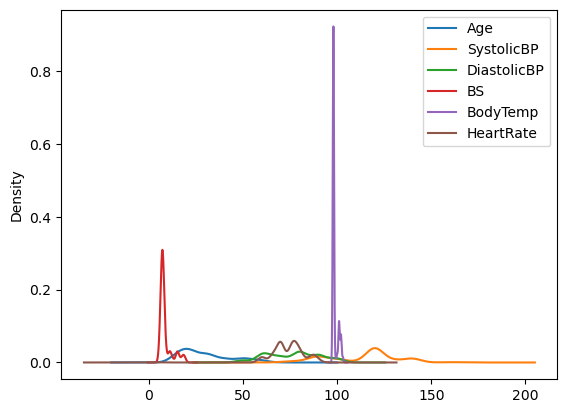

In [15]:
df.plot.kde()
plt.show()

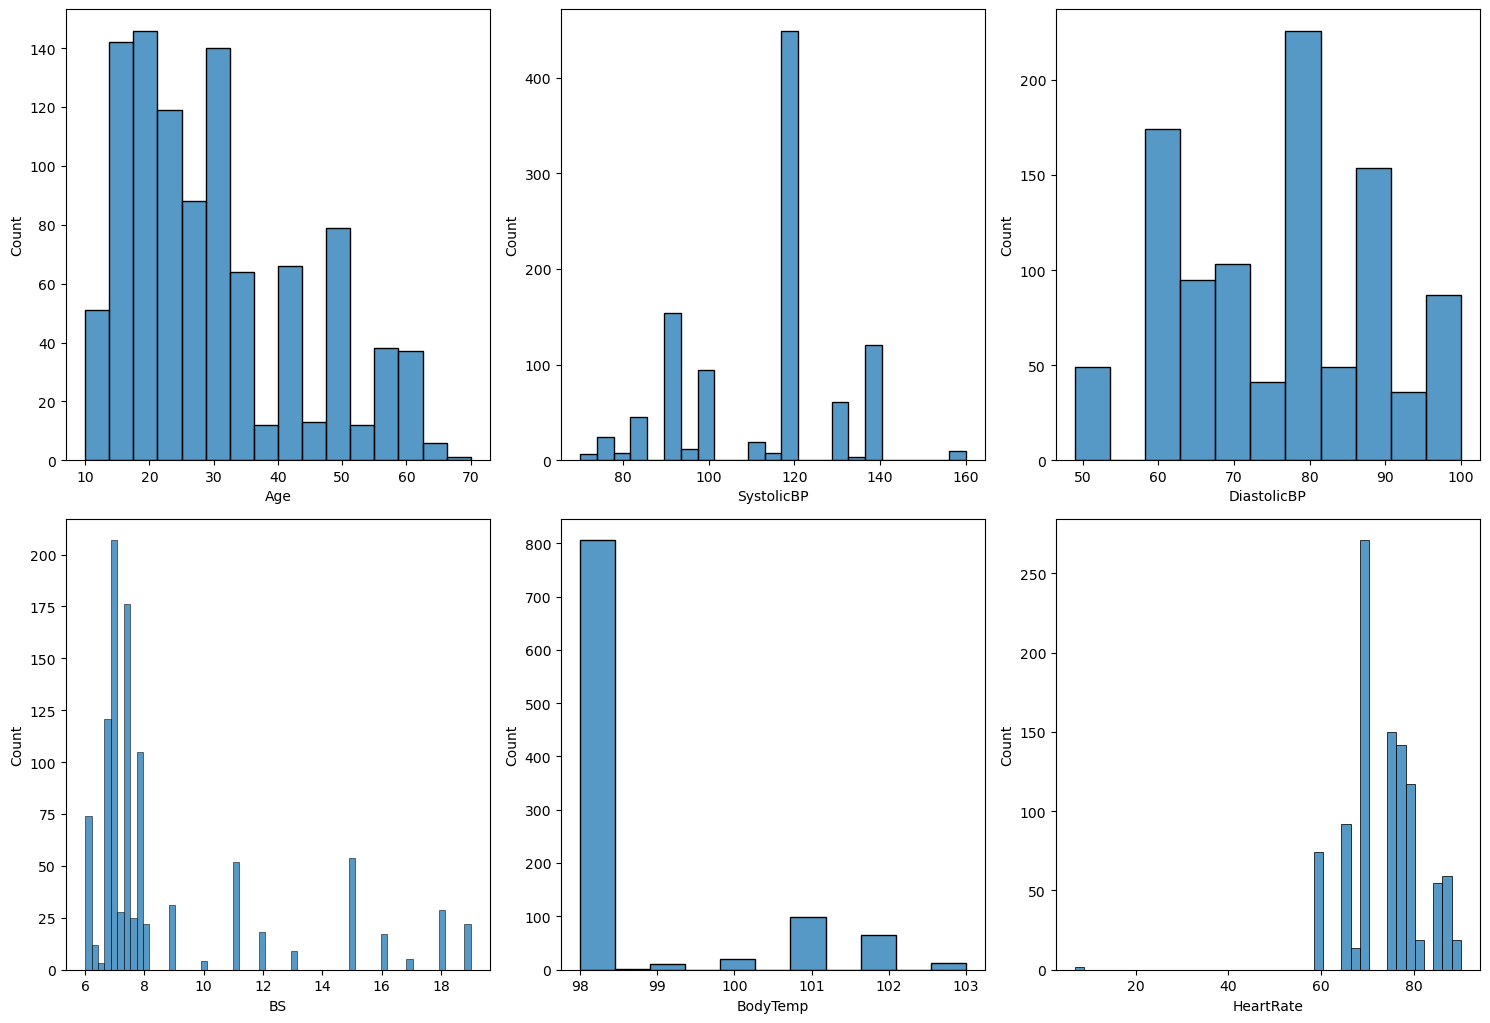

In [16]:
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.histplot(x = df[col], ax = ax)

fig.tight_layout()
plt.show()

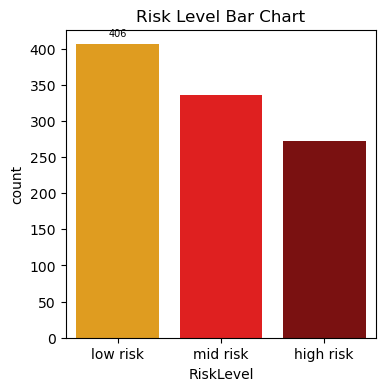

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

p_colors = ['orange', 'red', 'darkred']
risk_order = ["low risk", "mid risk", "high risk"]
plt.figure(figsize=(4, 4))
plt.title('Risk Level Bar Chart')
count = sns.countplot(x="RiskLevel", data=df, order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height(), 'd'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=7, xytext=(0, 8), textcoords='offset points')
    plt.show()


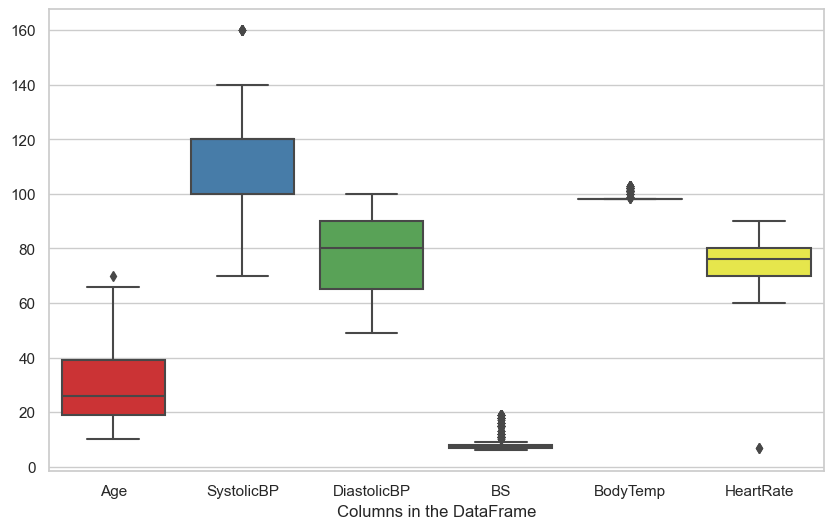

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(10, 6))
# Setting the style of the plot
sns.set(style="whitegrid")
# Create a box plot for the entire dataset with a color palette
sns.boxplot(data=df, palette="Set1")  # Using 'df' as the DataFrame and a predefined color palette 'Set1'
# Set x-axis label
plt.xlabel('Columns in the DataFrame')  # Replace 'column' with a more descriptive label
plt.show()


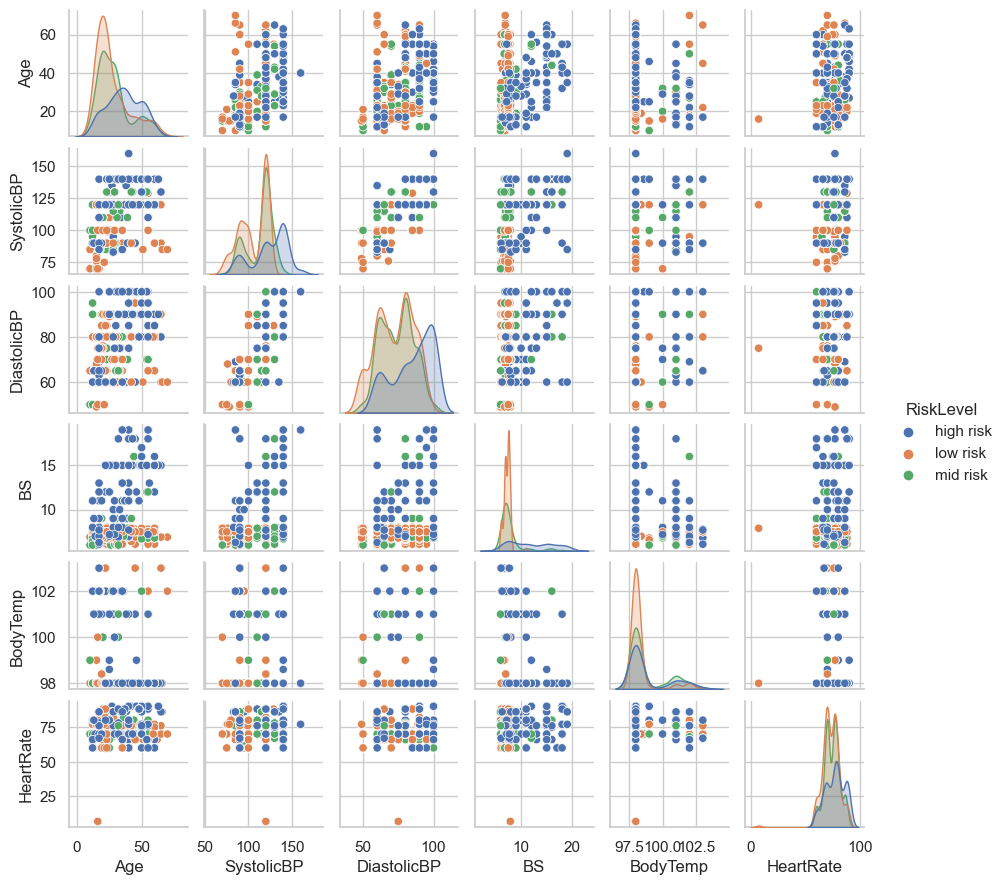

In [26]:
# Pairplot visualization with risklevel as hue
sns.pairplot(df,height=1.5 ,hue='RiskLevel')
plt.show()

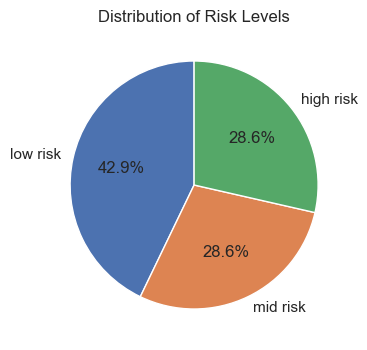

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'RiskLevel': ['low risk', 'mid risk', 'high risk', 'low risk', 'mid risk', 'high risk', 'low risk']})

plt.figure(figsize=(4, 8))
risk_counts = df['RiskLevel'].value_counts()
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Risk Levels')
plt.show()


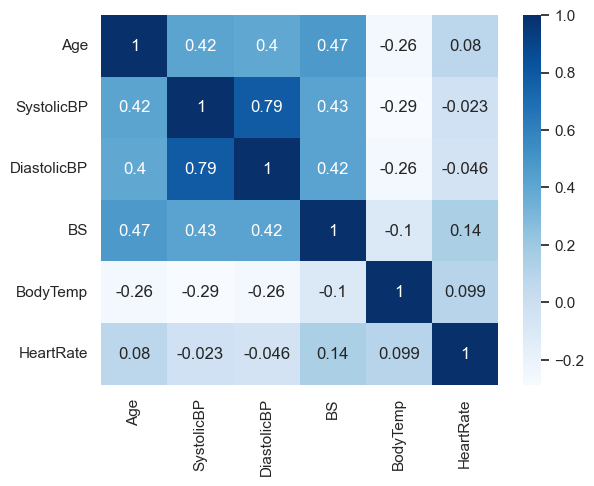

In [34]:
sns.heatmap(data = df.corr(),annot = True,  cmap = "Blues")
plt.show()

In [35]:
# importing Dataset
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [36]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

Feature Selection: You selected features ('Age', 'SystolicBP', 'DiastolicBP', 'HeartRate') that are presumably relevant for predicting the risk level. Ensure that these features are meaningful and appropriate for your problem domain.

Splitting Data: You split the dataset into training and testing sets using the train_test_split function from sklearn.model_selection. This helps to evaluate the model's performance on unseen data.

Model Training: You created a RandomForestClassifier model and trained it on the training data using the fit method. Random forests are an ensemble learning method that fits multiple decision tree classifiers on various sub-samples of the dataset.

Model Evaluation: You predicted the target variable ('RiskLevel') on the testing data using the predict method. Then, you calculated and printed the accuracy scores for both the training and testing data. High accuracy on the training set compared to the test set might indicate overfitting.

Accuracy Score: You calculated the accuracy score using the accuracy_score function from sklearn.metrics. It measures the proportion of correctly predicted instances out of the total instances.

Classification Report: The classification report provides a summary of different evaluation metrics like precision, recall, and F1-score for each class in the target variable. It gives insight into the model's performance across different classes.

## 1. Random Forest Classification

Random forests are for supervised machine learning, where there is a labeled target variable. Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.

In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Feature Selection

In [87]:
# Extracting features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

## Splitting the data

In [88]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model

In [89]:
# Initializing Random Forest Classifier
rf = RandomForestClassifier()

# Training Random Forest model on the training set
rf.fit(X_train, y_train)

RandomForestClassifier()

## Evaluate the Model

In [90]:

# Predicting on training and testing data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculating train and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generating classification report for test data
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Train Accuracy: 0.935881627620222
Test Accuracy: 0.8177339901477833
Classification Report:
              precision    recall  f1-score   support

   high risk       0.85      0.87      0.86        47
    low risk       0.86      0.76      0.81        80
    mid risk       0.76      0.84      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.82       203
weighted avg       0.82      0.82      0.82       203

Confusion Matrix:
 [[40  2  5]
 [ 4 71  5]
 [13 42 21]]


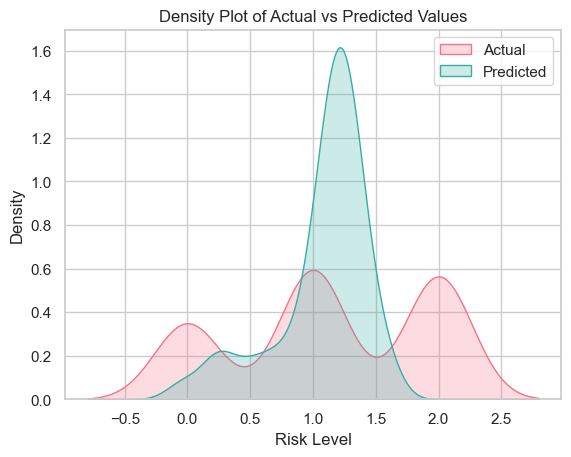

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of colors for the density plots
colors = sns.color_palette("husl", 2)

# Plot density plot for actual values
sns.kdeplot(y_test, label='Actual', color=colors[0], shade=True)

# Plot density plot for predicted values
sns.kdeplot(y_pred, label='Predicted', color=colors[1], shade=True)

plt.xlabel('Risk Level')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted Values')
plt.legend()
plt.show()


## 2. Decision Trees

Decision tree algorithm is a popular supervised machine learning technique used for both classification and regression tasks. It's based on a tree-like structure where internal nodes represent feature tests, branches represent the outcomes of those tests, and leaf nodes represent the final decision or prediction.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Decision Tree Classifier
dt = DecisionTreeClassifier()

# Training Decision Tree model on the training set
dt.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculating train and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.935881627620222
Test Accuracy: 0.8177339901477833


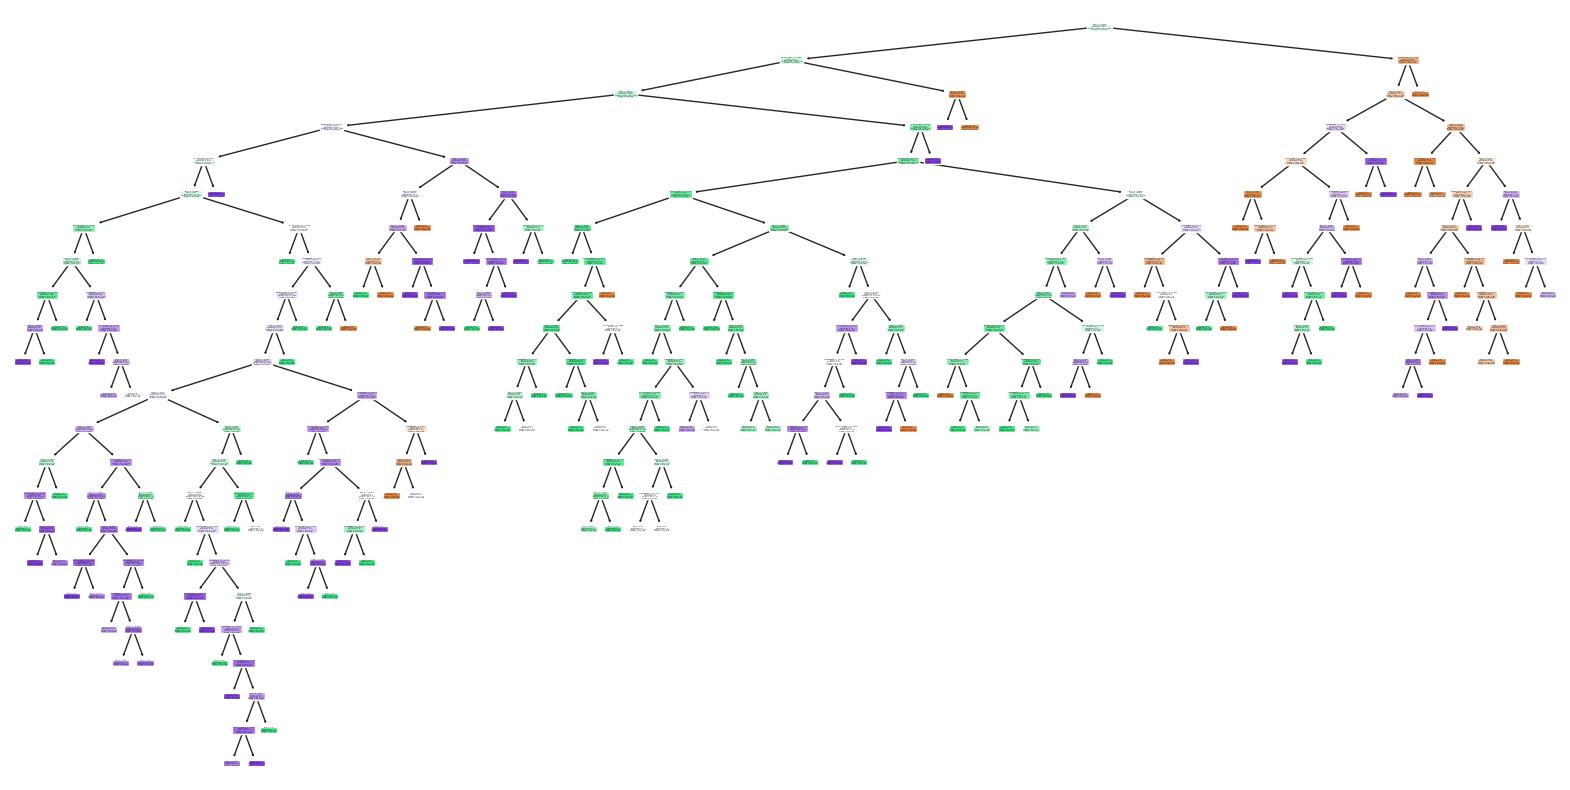

In [109]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()


## 3. K-Nearest Neighbours

Decision tree algorithm is a popular supervised machine learning technique used for both classification and regression tasks. It's based on a tree-like structure where internal nodes represent feature tests, branches represent the outcomes of those tests, and leaf nodes represent the final decision or prediction.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature variables and 'y' contains your target variable
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing K Nearest Neighbors Classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Training the KNN model on the training set
knn.fit(X_train, y_train)

# Predicting on the testing data
y_pred = knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6945812807881774


## 4. Support Vector Machine

Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks. SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships.

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature variables and 'y' contains your target variable
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Support Vector Classifier (SVC) model
svm = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Training the model on the training set
svm.fit(X_train, y_train)

# Making predictions on the training and testing data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculating training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.6633785450061652
Test Accuracy: 0.6600985221674877


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data cleaning and preprocessing
# (Assuming 'risk' is the target variable)
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Handling missing values, if any
X.fillna(X.mean(), inplace=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


SVM Accuracy: 0.6798029556650246
Confusion Matrix:
 [[40  3  4]
 [ 4 70  6]
 [ 6 42 28]]


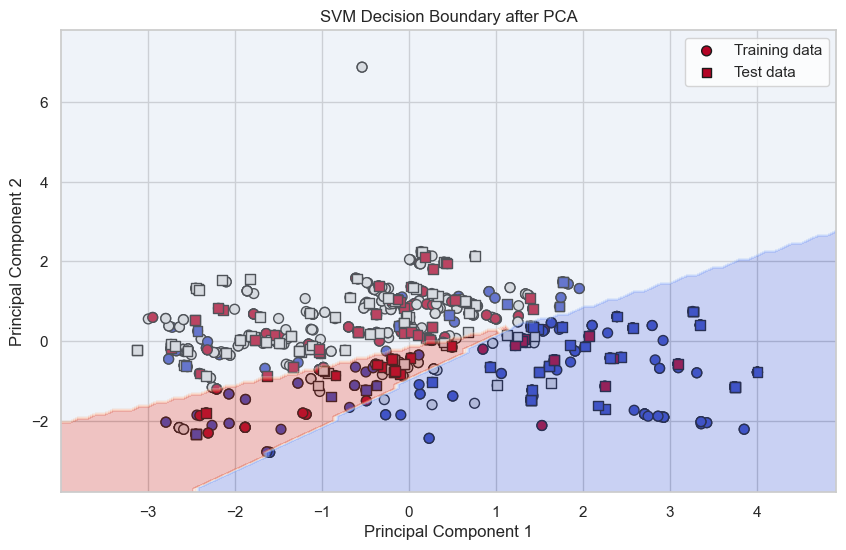

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train, y_test are already defined and contain data

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Convert string labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the SVM model
svm = SVC(kernel='linear')  # You can also use other kernels like 'rbf'
svm.fit(X_train_pca, y_train_encoded)

# Plot decision boundary
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, cmap='coolwarm', s=50, edgecolors='k', label='Training data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, cmap='coolwarm', s=50, marker='s', edgecolors='k', label='Test data')

# Create a meshgrid for decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary after PCA')
plt.legend()
plt.show()


## 5. Logistic Regression

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data cleaning and preprocessing
# (Assuming 'risk' is the target variable)
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Handling missing values, if any
X.fillna(X.mean(), inplace=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.6502463054187192
Confusion Matrix:
 [[40  2  5]
 [ 4 71  5]
 [13 42 21]]


#  6. Naive Bayes

In [93]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)

print("Train accuracy:",nb.score(X_train,y_train))
print("Test accuracy:",nb.score(X_test,y_test))

y_pred = nb.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy: 0.6091245376078915
Test accuracy: 0.5763546798029556
['low risk' 'high risk' 'high risk' 'low risk' 'mid risk' 'mid risk'
 'low risk' 'mid risk' 'low risk' 'mid risk' 'high risk' 'low risk'
 'low risk' 'low risk' 'mid risk' 'low risk' 'low risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'mid risk' 'low risk' 'high risk'
 'low risk' 'low risk' 'high risk' 'low risk' 'low risk' 'low risk'
 'mid risk' 'high risk' 'low risk' 'low risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'high risk' 'high risk' 'mid risk'
 'high risk' 'low risk' 'low risk' 'mid risk' 'high risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'low risk' 'mid risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'low risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'mid risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'high risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'low ri

##  . Linear Regression

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 
from sklearn.linear_model import LogisticRegression #Lasso regression model

In [95]:
train, test = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 811
No. of testing examples: 203


In [97]:
y_test=test['RiskLevel']
x_test=test.drop('RiskLevel', axis=1)

In [98]:
#Setting training data into x_train and y_train
x_train=train.drop('RiskLevel',axis=1)
y_train=train['RiskLevel']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((811, 6), (811,), (203, 6))

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Data cleaning and preprocessing
# (Assuming 'RiskLevel' is the target variable)
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Handling missing values, if any
X.fillna(X.mean(), inplace=True)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Convert predictions to discrete values (0 or 1) for binary classification
y_pred_discrete = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Calculate accuracy (using accuracy_score for regression)
accuracy = accuracy_score(y_test, y_pred_discrete)
print("Accuracy:", accuracy)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Accuracy: 0.49261083743842365
Mean Squared Error: 0.43595737518252153
